In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys

sys.path.append("../")
from src.visualization.visualize import *
warnings.filterwarnings("ignore")

In [2]:
# !unzip ../data/raw/filtered_paranmt.zip

In [3]:
data_path = "../data/raw/filtered.tsv"
df = pd.read_csv(data_path, sep='\t', index_col=0)
df.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


# Toxicity of the sentences

Let's check how the `ref_tox` and `trn_tox` are distributed

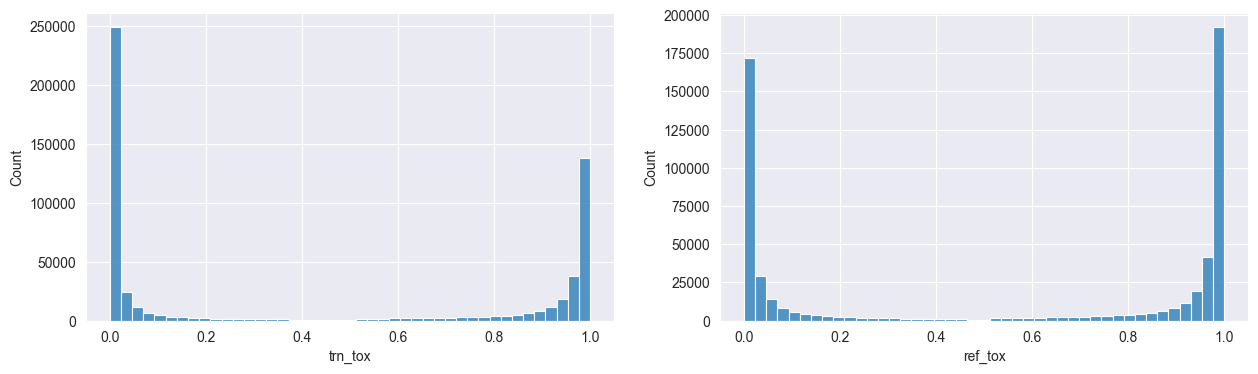

In [4]:
draw_histograms(df, 'trn_tox', 'ref_tox')

We see that `trn_tox` and `ref_tox` are in the range from 0 to 1. Let's transform the dataset so that one column contains toxic phrases, and the second contains neutral phrases.

In [6]:
df['toxic'] = df.apply(lambda x: x['reference'] if x['ref_tox'] > x['trn_tox'] else x['translation'], axis=1)
df['detoxified'] = df.apply(lambda x: x["translation"] if x['ref_tox'] > x['trn_tox'] else x['reference'], axis=1)
df['tox_tox'] = df.apply(lambda x: x["ref_tox"] if x['ref_tox'] > x['trn_tox'] else x['trn_tox'], axis=1)
df['detox_tox'] = df.apply(lambda x: x["trn_tox"] if x['ref_tox'] > x['trn_tox'] else x['ref_tox'], axis=1)
df.drop(columns=['reference', 'translation', 'trn_tox', 'ref_tox'], inplace=True)

In [7]:
df.head()

,similarity,lenght_diff,toxic,detoxified,tox_tox,detox_tox
0,0.785171,0.010309,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.981983,0.014195
1,0.749687,0.071429,you're becoming disgusting.,Now you're getting nasty.,0.999039,0.065473
2,0.919051,0.268293,"well, we can spare your life.","Well, we could spare your life, for one.",0.985068,0.213313
3,0.664333,0.309524,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.994215,0.053362
4,0.726639,0.181818,I have orders to kill her.,I've got orders to put her down.,0.999348,0.009402


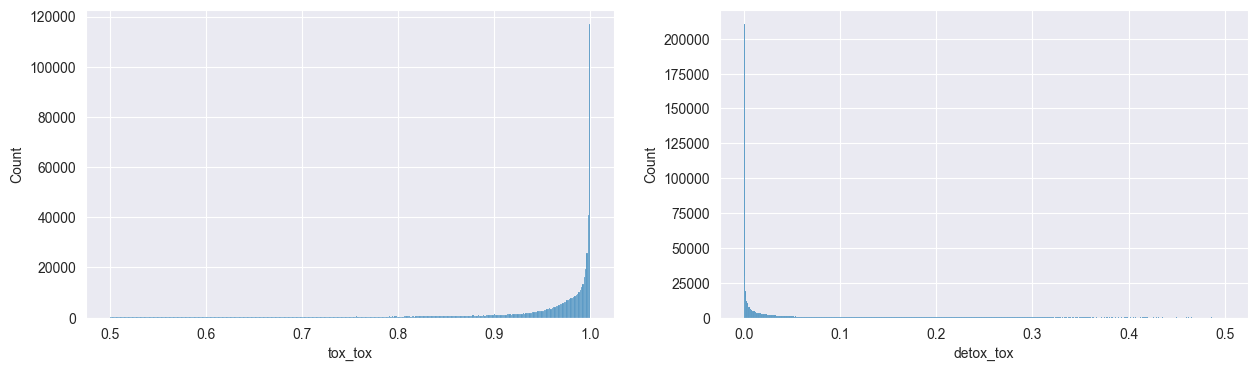

In [8]:
draw_histograms(df, 'tox_tox', "detox_tox")

# Exploring toxicity level of the neutral sentences

Let's find out how many sentences there are, where after detoxification there is a high level of toxicity, and sentences where the difference in toxicity is small.

## Toxicity difference

In [9]:
df['tox_diff'] = df['tox_tox'] - df['detox_tox']

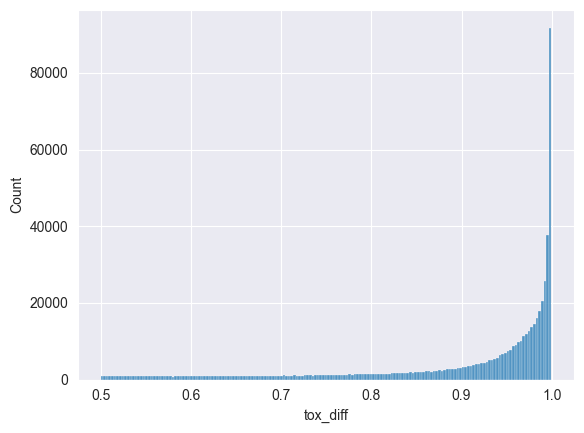

In [10]:
sns.histplot(df['tox_diff']);

There are some results where `tox_diff` is small, let's check it

In [11]:
df_tox_diff = df[df['tox_diff'] < 0.6]

In [12]:
df_tox_diff.sort_values(by='tox_diff')

,similarity,lenght_diff,toxic,detoxified,tox_tox,detox_tox,tox_diff
302957,0.744230,0.089286,I'm going to let it pass through the mass spec...,Fine. I'm gonna run this through the mass spec...,0.508555,0.008553,0.500002
274475,0.717746,0.228916,"""I'll tie you up, I'll put the cuffs on you, I...","""I'm going to tie you up. ""I'm going to handcu...",0.592993,0.092991,0.500002
368899,0.778185,0.307692,I smothered her to death.,I suffocated her.,0.994705,0.494704,0.500002
321294,0.894869,0.151515,"""if you can kill the fires of fire, we will fo...","""If you can kill the fire plants, we will wors...",0.936176,0.436173,0.500002
128885,0.802599,0.076923,"remember, she must not be harmed, or she will ...","Remember, she's not to be harmed... or she's w...",0.922565,0.422561,0.500004
...,...,...,...,...,...,...,...
175252,0.738857,0.023810,You're a kos'kari trying to lure me away.,"you're a coconut, trying to lure me out.",0.620493,0.020504,0.599989
191463,0.922523,0.142857,I need you to put your head back and open your...,I'm gonna need you to hold your head back and ...,0.881825,0.281834,0.599991
411458,0.686416,0.050000,"Darker. All I know is, back there, killing tho...",all I know is that in the killing of those vam...,0.612521,0.012525,0.599995
15336,0.743004,0.189189,I don’t want to see any of you hurt.,I don't want you to get hurt.,0.605983,0.005988,0.599995


In the dataset, all `tox_diff` values are greater than 0.5. In most cases, this applies to cases where the quality of detoxification is unsatisfactory or the style of the sentence is close to neutral. I think that for training purpose we need only the cases with quality of detoxification, that's why I will remove such cases, where the toxicity of transformed sentence is high.

## Cleaning data

I remain only data where `detox_tox` less than 0.35 and `tox_diff` greater 0.6 - where quality of detoxification is good

In [13]:
df = df[(df['detox_tox'] < 0.35) & (df['tox_diff'] > 0.6)]

# Similarity and length difference distribution
I have a hypothesis that the detoxification model should receive sentences with similar meaning in the training process to improve performance, because in such way it will produce the sentence with same meaning, but using synonyms instead of toxic words. Also, I have a hypothesis that model can just remove toxic words from the phrase and thus change the meaning of the phrase.
But I can't confirm or deny these hypothesis, so I just drop some values to prevent such behavior.
Let's check the distribution of these parameters.

## Similarity

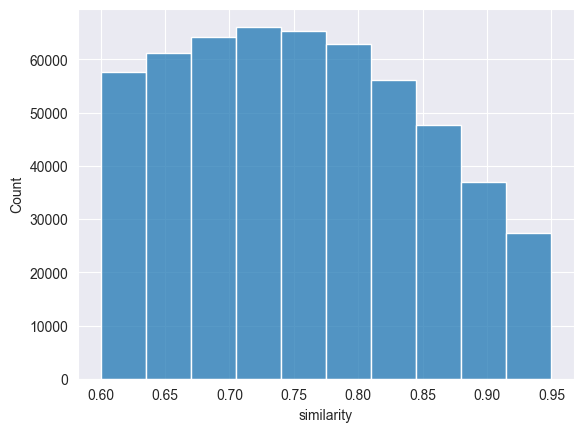

In [14]:
sns.histplot(df['similarity'], bins=10);

In [15]:
df.query('similarity < 0.7')[['toxic', 'detoxified', 'similarity', 'tox_tox']].sample(15).sort_values(by='similarity')

,toxic,detoxified,similarity,tox_tox
188973,Liar! You're just like the Tolmekians,you're the same as Tolmekians!,0.622726,0.998640
170782,"Gene McClary's favorite ass kisser, Phil Woodw...","gene McClary's favourite tyler, Phil Woodward.",0.627788,0.997311
160268,"Honey, you could shoot me from across the stre...","even if you filmed me across the street, it wo...",0.629579,0.992563
242254,you can't eat dick.,Don't eat all of these!,0.634438,0.998675
487199,Get off him!,don't touch him!,0.639649,0.914802
268037,do you want him to die quickly or to suffer?,Do you want his death to be easy or painful?,0.643574,0.784445
575971,and get me some hot chicks.,And send over some hot girls for that.,0.657412,0.801897
201747,"You know, the world needs more rough-hewn stri...","you know, the world needs more slave fighters ...",0.659581,0.901888
247104,They got a cherry pie there that'll kill you.,their cherry pie is a killer.,0.662687,0.968366
473415,I can't fucking...,you can't...,0.667291,0.983425


We can see that even relatively similar (similarity $\approx 0.7$) sentences don't have similar meaning, but so many pairs have low similarity score and I decide to drop all pairts with similarity less that 0.7

In [16]:
df = df.query('similarity >= 0.7')

## Length difference

In [17]:
length_df = df.copy()
length_df['toxic_len'] = df['toxic'].map(len)
length_df['detox_len'] = df['detoxified'].map(len)

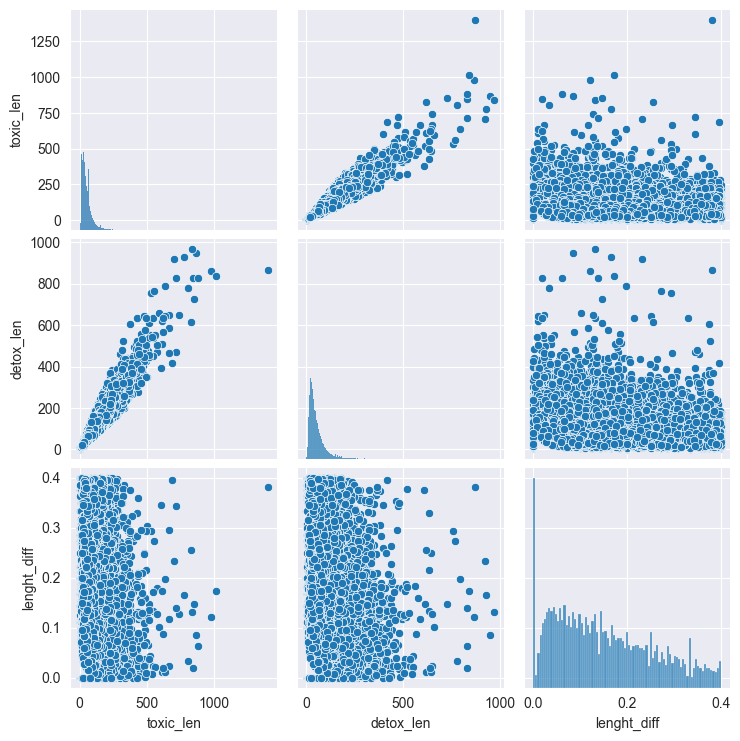

In [18]:
sns.pairplot(length_df, x_vars=['toxic_len', 'detox_len', 'lenght_diff'], y_vars=['toxic_len', 'detox_len', 'lenght_diff']);

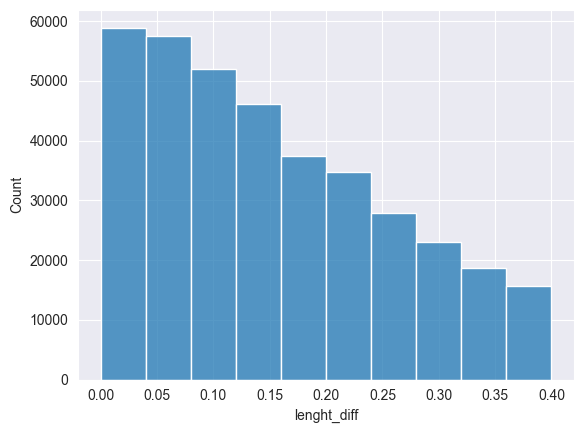

In [19]:
sns.histplot(length_df['lenght_diff'], bins=10);

In [20]:
length_df.query('lenght_diff > 0.35 & toxic_len > detox_len')[['toxic', 'detoxified', 'lenght_diff']].sample(10)

,toxic,detoxified,lenght_diff
279727,You? Fuck you.,for you?,0.400000
101816,Pecks make terrible nursemaids.,pecks are terrible.,0.375000
389412,I shot that piece of filth.,I shot the dirt.,0.392857
454303,All of you're freaks. Mutations.,you're all mutants!,0.393939
554193,You quit? Shit.,you quit?,0.375000
342454,"If she ends up dead, none of this is gonna rea...","if she ends up dead, this won't matter.",0.393939
56650,"I mean, look at this shithole.",look at this hole.,0.387097
531803,"That won't be necessary ranger. Damn, stand me...","that won't be necessary, Ranger.",0.352941
492386,I am a shi... shield for bullets.,a shield for bullets.,0.352941
64413,"It was really amazing, 'cause here's a thing t...","you can record it to sound like a tape, but yo...",0.369231


Using the results above, I can conclude that often the pairs with high level of `lenght_diff` just small sentences, where toxic words was removed and meaning doesn't change. I want to drop only the values with high level of `lenght_diff`, small level of `similarity` and where `toxic_len` > `detox_len` in order to prevent my hypothesis.

In [56]:
df = df.drop(length_df.query('lenght_diff > 0.35 & toxic_len > detox_len & similarity < 0.77').index)

# Saving the dataframes

I plan to train 2 models, one for detoxification, the second for determining toxicity. In order to do it, I create two datasets, one only with toxic and non-toxic sentences, and second with all sentences and toxicity levels

In [57]:
detox_df = df[['toxic', 'detoxified']]
detox_df.to_csv('../data/interim/tox_sentences.csv', index=None)

In [58]:
sentence_toxicity_level = []
for _, row in df.iterrows():
    sentence_toxicity_level.append([row['toxic'], row['tox_tox']])
    sentence_toxicity_level.append([row['detoxified'], row['detox_tox']])

In [59]:
toxicity = pd.DataFrame(sentence_toxicity_level, columns=['text', 'tox_level'])
toxicity.to_csv('../data/interim/toxicity_levels.csv', index=None)

In [60]:
!zip ../data/interim/tox_sentences.zip ../data/interim/tox_sentences.csv
!zip ../data/interim/toxicity_levels.zip ../data/interim/toxicity_levels.csv

updating: ../data/interim/tox_sentences.csv (deflated 63%)
updating: ../data/interim/toxicity_levels.csv (deflated 58%)
